In [2]:
import pandas as pd
import numpy as np
import re, string, unicodedata
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sn
pal = sn.color_palette()
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.util import ngrams
nltk.download('wordnet') 
%matplotlib inline
import contractions
import gensim
from wordcloud import WordCloud
from collections import Counter, defaultdict
import inflect
#from textblob import TextBlob
import spacy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramendra.tyagi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
sw_nltk=", ".join(stopwords.words('english'))

<strong>Read Data</strong>

In [4]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"sms_text"})
df.head()

label                                           sms_text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [4]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   sms_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<strong>Common functions</strong>

In [25]:
def generate_ngrams(text,ngram=1):
    pattern= '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
    cleaned_text = text.translate(str.maketrans('', '', pattern))
    nostop_words = []
    for word in cleaned_text.split():
        if word not in sw_nltk:
            nostop_words.append(word)
            
    ngram_list = ngrams(nostop_words, ngram)
    
    return ngram_list


def show_wordcloud(text):
    ham_cloud = WordCloud(background_color="#ffa78c").generate(text)
    plt.figure(figsize=(12,8))
    return plt.imshow(ham_cloud)
    

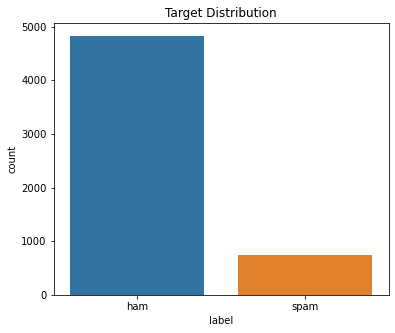

In [6]:
plt.figure(figsize=(6,5))
plt.title("Target Distribution")
plot= sn.countplot(x="label", data=df)

<strong>Character Distribution</strong>

In [24]:
messages = pd.Series(df['sms_text'].tolist()).astype(str)
ham_messages = pd.Series(df[df['label'] == 'ham']['sms_text'].tolist()).astype(str)
spam_messages = pd.Series(df[df['label'] == 'spam']['sms_text'].tolist()).astype(str)
dist_all = messages.apply(len)
dist_ham = ham_messages.apply(len)
dist_spam = spam_messages.apply(len)

Text(0, 0.5, 'Probability')

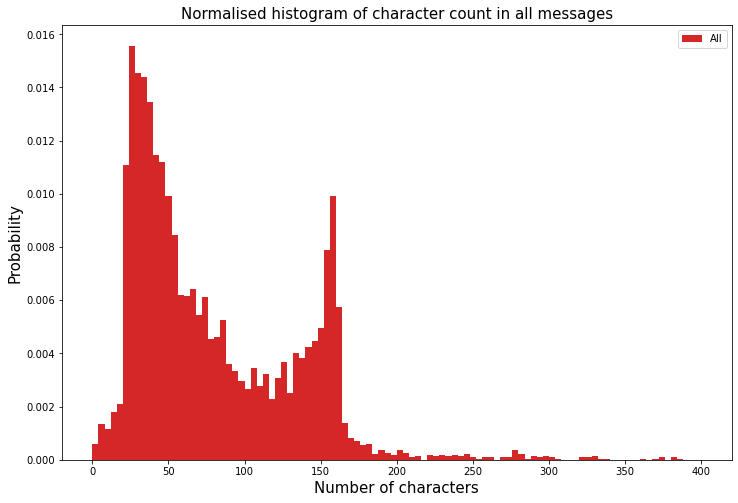

In [25]:
plt.figure(figsize=(12, 8))
plt.hist(dist_all, bins=100, range=[0,400], color=pal[3],density=True, label='All')
plt.title('Normalised histogram of character count in all messages', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

<strong>Character distribution ham vs spam</strong>

Text(0, 0.5, 'Probability')

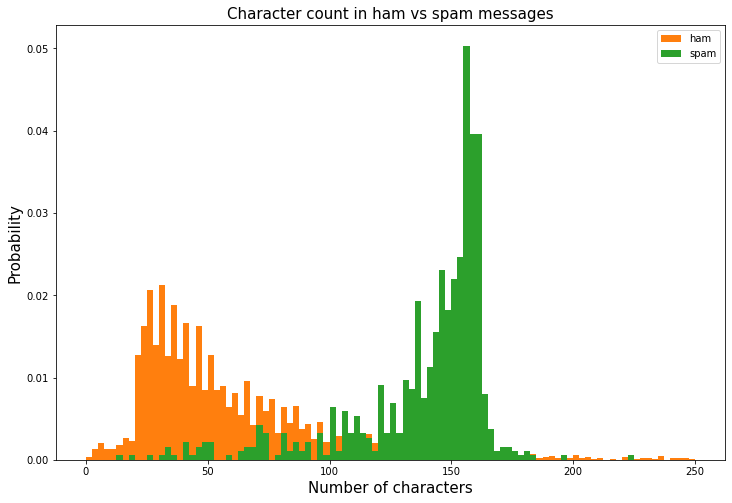

In [26]:
plt.figure(figsize=(12,8))
plt.hist(dist_ham, bins=100, range=[0,250], color=pal[1], density=True, label='ham')
plt.hist(dist_spam, bins=100, range=[0, 250], color=pal[2], density=True, label='spam')
plt.title('Character count in ham vs spam messages', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

<strong>All messages word cloud</strong>

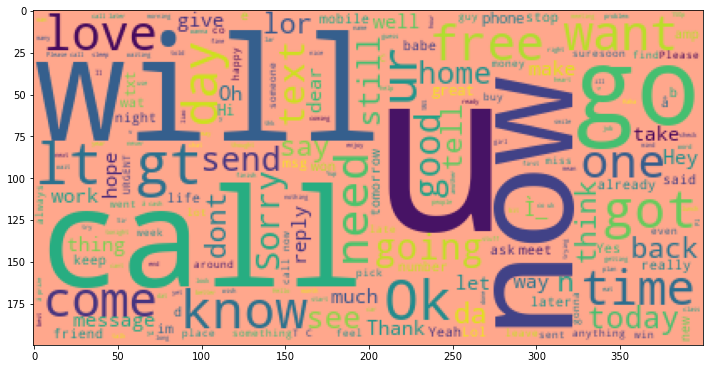

In [27]:
all_messages_one_string = " ".join(messages)
show_wordcloud(all_messages_one_string)

<strong>Word cloud ham messages</strong>

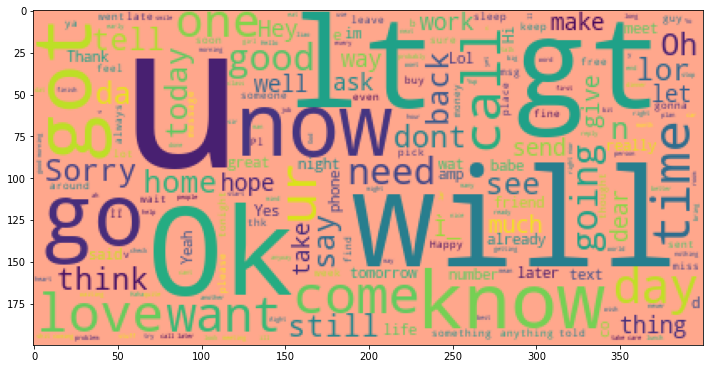

In [28]:
ham_messages_one_string = " ".join(ham_messages)
show_wordcloud(ham_messages_one_string)

<strong>Word cloud spam messages</strong>

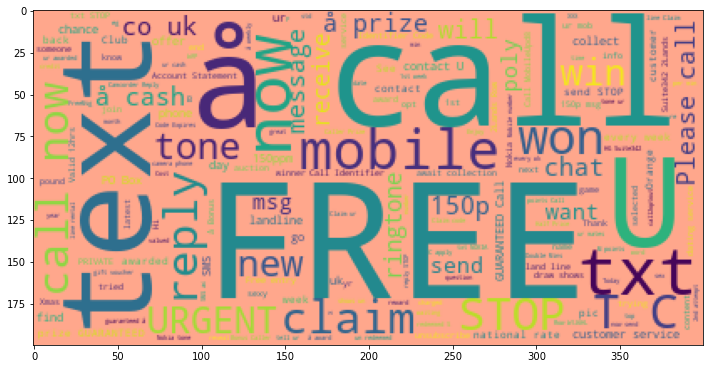

In [29]:
spam_messages_one_string = " ".join(spam_messages)
show_wordcloud(spam_messages_one_string)

<strong>Most frequent words ham messages</strong>

In [30]:
ham_words_list = ham_messages_one_string.split()
total_ham_words = len(ham_words_list)
print("Total number of words in ham messages: ", total_ham_words)
ham_words_dict = Counter(ham_words_list).most_common()
ham_words_dict[:10]

Total number of words in ham messages:  68518


[('to', 1530),
 ('you', 1458),
 ('I', 1436),
 ('the', 1019),
 ('a', 969),
 ('and', 738),
 ('i', 736),
 ('in', 734),
 ('u', 645),
 ('is', 638)]

<strong>Most frequent words spam messages</strong>

In [31]:
spam_words_list = spam_messages_one_string.split()
total_spam_words = len(spam_words_list)
print("Total number of words in spam messages: ", total_spam_words)
spam_words_dict = Counter(spam_words_list).most_common()
spam_words_dict[:10]

Total number of words in spam messages:  17817


[('to', 604),
 ('a', 358),
 ('your', 187),
 ('call', 185),
 ('or', 185),
 ('the', 178),
 ('2', 169),
 ('for', 169),
 ('you', 164),
 ('is', 143)]

<Strong>Bigram Analysis</strong>

In [32]:
ham_ngrams = " ".join(ham_messages)
ham_bigram=generate_ngrams(ham_ngrams,2)
ham_bigramFreq = Counter(ham_bigram)
ham_bigramFreq.most_common(10)

[(('.', '.'), 70),
 (('I', 'dont'), 64),
 (('I', 'cant'), 47),
 (('Ill', 'call'), 46),
 (('call', 'later'), 46),
 (('I', 'think'), 46),
 (('I', 'know'), 44),
 (('ltgt', '.'), 43),
 (('I', 'love'), 41),
 (('I', 'want'), 40)]

In [34]:
spam_ngrams = " ".join(spam_messages)
spam_bigram=generate_ngrams(spam_ngrams,2)
spam_bigramFreq = Counter(spam_bigram)
spam_bigramFreq.most_common(10)

[(('Please', 'call'), 26),
 (('To', 'claim'), 23),
 (('URGENT', 'Your'), 20),
 (('å£1000', 'cash'), 19),
 (('prize', 'GUARANTEED.'), 19),
 (('GUARANTEED.', 'Call'), 19),
 (('This', '2nd'), 18),
 (('every', 'week'), 18),
 (('2', 'claim'), 17),
 (('PO', 'Box'), 17)]

<strong>Trigram Analysis</strong>

In [35]:
ham_trigram=generate_ngrams(ham_ngrams,3)
ham_trigramFreq = Counter(ham_trigram)
ham_trigrams_list= []
for item in ham_trigramFreq:
    ham_trigrams_list.append(' '.join(item))

pd.Series(ham_trigrams_list).astype(str)

0                Go jurong point
1           jurong point crazy..
2        point crazy.. Available
3        crazy.. Available bugis
4          Available bugis great
                  ...           
40260             week gave free
40261            gave free Rofl.
40262             free Rofl. Its
40263             Rofl. Its true
40264              Its true name
Length: 40265, dtype: object

In [36]:
spam_trigram=generate_ngrams(spam_ngrams,3)
spam_trigramFreq = Counter(spam_trigram)
spam_trigrams_list= []
for item in spam_trigramFreq:
    spam_trigrams_list.append(' '.join(item))

pd.Series(spam_trigrams_list).astype(str)

0                 Free entry 2
1                 entry 2 wkly
2                  2 wkly comp
3                wkly comp win
4                  comp win FA
                 ...          
8991        å£750 Pound prize.
8992    easy call 087187272008
8993    call 087187272008 NOW1
8994    087187272008 NOW1 Only
8995             NOW1 Only 10p
Length: 8996, dtype: object

<strong>Text Cleaning and preprocessing</strong>

In [62]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

#Lowercase text
def lower_case(text):
    return str(text).lower()

#Remove Url from text
def remove_URL(text):
    return re.sub(r"http\S+", "", text)


# remove email
def remove_email(text):
    return re.sub(r'^.+@[^\.].*\.[a-z]{2,}$',"", text)

# Remove Phonenumber
def remove_phonenumber(text):
    return re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',"",text)
    
#Currency
def currency(text):
    return re.sub(r'£|\$',"",text)

# Remove non ascii words
def remove_non_ascii(text):
    new_words = []
    for word in text.split():
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return ' '.join(new_words)

# Convert numbers to words
def replace_numbers(text):
    p = inflect.engine()
    new_words = []
    for word in text.split():
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return ' '.join(new_words)

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_spscial_characters(text):
    return re.sub(r'[^a-zA-z0-9\s]', '', text)

#remove Extra Space
def remove_extra_spaces(text):
    return re.sub(' +', ' ', text)

#Remove Punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

#word Contractions
def word_contractions(text):
    expanded_words = []   
    for word in text.split():
        expanded_words.append(contractions.fix(word))  
    
    return ' '.join(expanded_words)

#Remove Emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#remove emotins
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_stopwords(text):    
    return " ".join([word for word in str(text).split() if word not in sw_nltk])

def lemmatizaion_sent(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

def correct_typo(text):
    new_doc = TextBlob(text)
    return new_doc.correct()

#Removing the noisy text
def denoise_text(text):
    text = lower_case(text)
    text = strip_html(text)
    text = remove_punctuation(text)
    text = remove_between_square_brackets(text)
    text = remove_spscial_characters(text)
    text = remove_extra_spaces(text)
    text = remove_URL(text)
    text = remove_email(text)
    text = remove_non_ascii(text)
    return text


def normalize_text(text):
    text = remove_emoji(text)
    text = replace_numbers(text)
    text = remove_stopwords(text)
    text = word_contractions(text)
    text = lemmatizaion_sent(text)
    return text
    

In [63]:
df_sms= df.copy()

In [64]:
df_sms["sms_text"] = df_sms["sms_text"].apply(denoise_text)
df_sms["sms_text"] = df_sms["sms_text"].apply(normalize_text)

In [65]:
X= df_sms["sms_text"]
y= df_sms["label"]

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [67]:
model_selection=StratifiedShuffleSplit(test_size=0.2, random_state=0)
for train_index, test_index in model_selection.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [13]:
X_train.shape,y_train.shape, X_test.shape

((4457,), (4457,), (1115,))

In [120]:
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [160]:
#.shape,X_val.shape,y_test.shape,y_val.shape

<strong>Vectorization</strong>

In [68]:
# Naïve Bayes:
text_clf_nb = Pipeline([('count_vec', CountVectorizer(ngram_range=(2, 2))),('clf', MultinomialNB()),])

In [69]:
text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('count_vec', CountVectorizer(ngram_range=(2, 2))),
                ('clf', MultinomialNB())])

In [71]:
predictions = text_clf_nb.predict(X_test)

<strong>Model Evaluation</strong>

In [72]:
print(confusion_matrix(y_test,predictions))

[[961   5]
 [ 11 138]]


In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [193]:
# Print the overall accuracy
print(accuracy_score(y_test,predictions))

0.9856502242152466


<strong>Display the POS tagging on the first 4 rows of ‘sms’</strong>

In [40]:
data = df_sms[:4]["sms_text"]

for sms in data:
    text = word_tokenize(sms)
    print(sms+"\n")
    print(nltk.pos_tag(text))
    print("---------------------------------------")

go jurong point crazy available bugis great world la buffet cine get amore wat

[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('buffet', 'FW'), ('cine', 'NN'), ('get', 'NN'), ('amore', 'IN'), ('wat', 'NN')]
---------------------------------------
ok lar joking wif oni

[('ok', 'JJ'), ('lar', 'JJ'), ('joking', 'NN'), ('wif', 'NN'), ('oni', 'NN')]
---------------------------------------
free entry two wkly comp win fa cup final tkts 21st may two thousand five text fa eighty-seven thousand, one hundred twenty-one receive entry questionstd txt ratetcs apply 08452810075over18s

[('free', 'JJ'), ('entry', 'NN'), ('two', 'CD'), ('wkly', 'JJ'), ('comp', 'NN'), ('win', 'VBP'), ('fa', 'JJ'), ('cup', 'NN'), ('final', 'JJ'), ('tkts', 'NN'), ('21st', 'CD'), ('may', 'MD'), ('two', 'CD'), ('thousand', 'VB'), ('five', 'CD'), ('text', 'JJ'), ('fa', 'NN'), ('eighty-seven', 'JJ'), ('thousand', 'NN')

<strong>Build and display a dependency parser tree for the sentence</strong>

In [6]:
sentance = "the series opened 17 years later, as Viserys Targaryen tried to win an eastern tribal army to his side, so he could retake the Iron Throne"

In [7]:
from spacy import displacy
options = {"compact": True, "color": "blue"}
displacy.render(nlp(sentance),options=options,jupyter=True)